# Surfs Up Part 1

In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import MetaData, Table

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [5]:
# Declare the Base 
Base = automap_base()
Base.prepare(engine, reflect=True)

In [6]:
# Print all the classes mapped to the Base
Base.classes.keys()
# station and measurment

['measurement', 'station']

In [7]:
# save references for the tables station and measurment
station = Base.classes.station
measurement = Base.classes.measurement



In [8]:
# create session
session = Session(engine)


## Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
# use the date in measurments to find most recent
most_recent = session.query(func.max(measurement.date)).first()
most_recent


('2017-08-23',)

<Figure size 1200x1000 with 0 Axes>

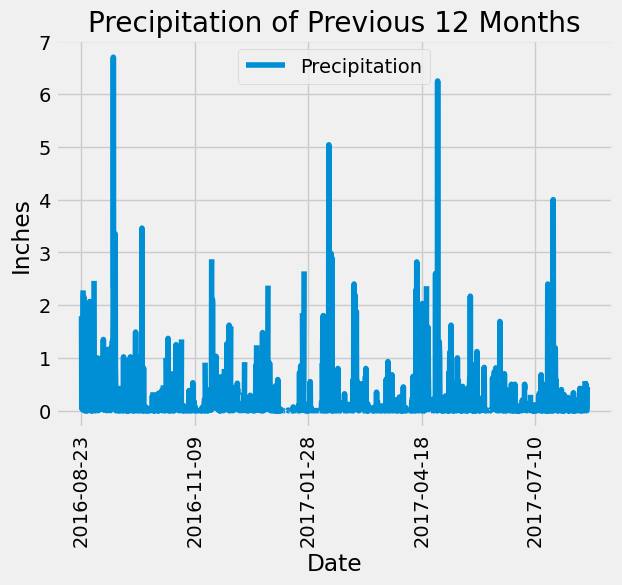

In [16]:
# design a query to retrieve the last 12 months of precipitation data and plot the results. 
# starting from the most recent data point in the database. 
# calculate the date one year from the last date in data set.
year_before = dt.date(2016, 8, 23)

# query to retrieve the data and precipitation scores
results = session.query(measurement.date, measurement.prcp).filter(measurement.date >= year_before)

# save as a DataFrame
df = pd.DataFrame(results, columns = ['Date', 'Precipitation'])

# sort the dataframe by date
df = df.sort_values('Date', ascending=True)

# use Pandas Plotting with Matplotlib to plot the data
# create
plt.figure(figsize=(12, 10))
df.plot(x = 'Date', y = 'Precipitation')

# customize
plt.title('Precipitation of Previous 12 Months')
plt.xlabel('Date')
plt.ylabel('Inches')
plt.xticks(rotation=90)

# show
plt.show()

In [17]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


## Exploratory Station Analysis

In [18]:
# design a query to calculate the total number of stations in the dataset
count_of_stations = session.query(func.count(station.station)).all()
count_of_stations

[(9,)]

In [39]:
# find the most active stations by the stations wiith the most rows - descending order
# query and join before groupby
most_active_stations = session.query(station.station, func.count(measurement.station).label('station_activity')).\
    join(measurement, station.station == measurement.station).group_by(station.station).\
    order_by(func.count(measurement.station).desc())

# Execute the query and fetch all results as tuples
active_stations = most_active_stations.all()

# Create a list of tuples containing station_id and measurement_count
active_stations_list = [(station_id, station_activity) for station_id, station_activity in active_stations]

print(active_stations_list)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [40]:
# using the most active station id from the previous query, calculate the lowest, highest, and average temperature
# identify 1st entry from list of most active stations
most_active_station = active_stations_list[0][0]  

# query to calculate lowest, highest, and average temperature for the most active station
temperature_stats = session.query(
    func.min(measurement.tobs).label('min_temp'),
    func.max(measurement.tobs).label('max_temp'),
    func.avg(measurement.tobs).label('avg_temp')
)

# print results of query
print(min_temp, max_temp, avg_temp)

54.0 85.0 71.66378066378067


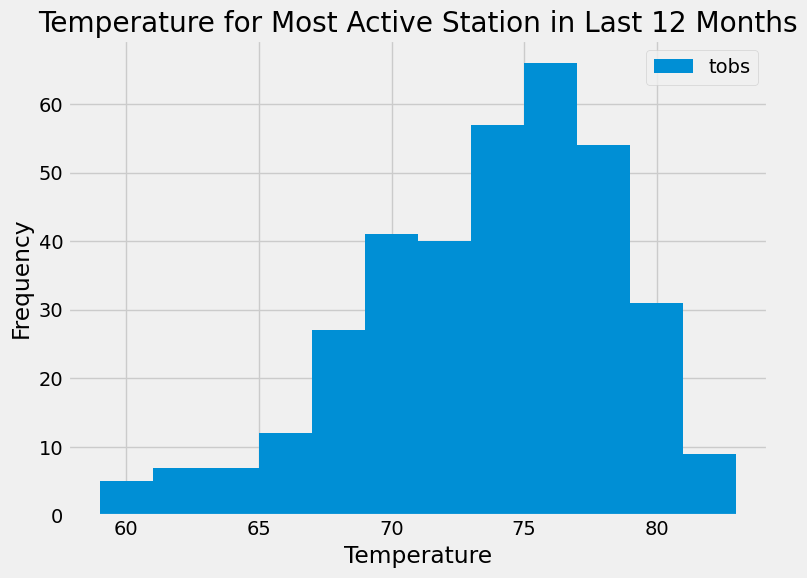

In [45]:
# Using the most active station
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# get data of only previous 12 months 
latest_date = session.query(func.max(measurement.date)).filter(measurement.station == most_active_station).scalar()
year_before = dt.datetime.strptime(latest_date, '%Y-%m-%d') - dt.timedelta(days=365)

# query to retrieve temperature data for the most active station
temperature_data = session.query(measurement.date, measurement.tobs).filter(measurement.station == most_active_station).\
    filter(measurement.date >= year_before).all()

# create a DataFrame for temperature data
df = pd.DataFrame(temperature_data, columns=['Date', 'Temperature'])

# create
plt.figure(figsize=(8, 6))
plt.hist(df['Temperature'], bins=12, label='tobs')

# customize
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature for Most Active Station in Last 12 Months')
plt.legend()

# show
plt.tight_layout()
plt.show()

In [46]:
# Close Session
session.close()